In [0]:
#importing liabrary
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
from sklearn.model_selection import train_test_split

In [0]:
#Getting data from Magicbrick website 

page_no = 2


csv_file = open('housing_price_magicbricks_data.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Price', 'Area', 'Bedrooms' ])


while page_no < 150:
  url_in="https://www.magicbricks.com/independent-house-for-sale-in-bangalore-pppfs/page-"+str(page_no)
  
  response = requests.get(url_in)
  html_soup = BeautifulSoup(response.text, 'html.parser')
  all_info =html_soup.find_all(class_='flex relative clearfix m-srp-card__container')


  for x in all_info:
    price = x.find(class_="m-srp-card__price").text
    area = x.find_all(class_="m-srp-card__summary__info")[0].text.replace(' sqft','')
    bedrooms = x.find(class_="m-srp-card__title").text.replace('\n',' ')
    csv_writer.writerow([price, area, bedrooms])

  next_page = "https://www.magicbricks.com/independent-house-for-sale-in-bangalore-pppfs/page-"+str(page_no)
  page_no += 1
  
  
csv_file.close()

In [3]:
#reading data 

df = pd.read_csv('housing_price_magicbricks_data.csv')
df.head()

,Price,Area,Bedrooms
0,2.10 Cr,2000 sqft,\t\t\t \t\t \t\t\t \t\...
1,1.50 Cr,3400 sqft,\t\t\t \t\t \t\t\t \t\...
2,3 Cr,2400 sqft,\t\t\t \t\t \t\t\t \t\...
3,61 Lac,1450 sqft,\t\t\t \t\t \t\t\t \t\...
4,40.70 Cr,1850 sqft,\t\t\t \t\t \t\t\t \t\...


In [4]:
#Some feature engineering
#Extaracting area in numbers
df['Area'] = df['Area'].str.extract('(\d+)', expand=True) 

#separating location and number of bedrooms
df['Location'] = df['Bedrooms'] 

#extracting number of bedrooms only
df['Bedrooms'] = df['Bedrooms'].str.extract('(\d+)', expand=True) 

#removing unwanted text from location column till "in" text
def removeAfterIn(string):
    return string.split('in ')[1].strip()
df.Location = df.Location.apply(removeAfterIn)

#removing "Bangalore" word from the loation column
def removeAfterBangalore(string):
    return string.split(' Bangalore')[0].strip()
df.Location = df.Location.apply(removeAfterBangalore)

#removing "comma" from location column
def removeAfterComma(string):
    return string.split(',')[0].strip()
df.Location = df.Location.apply(removeAfterComma)

#converting "Cr" and "Lac" in number
def convert_si_to_number(x):
    total_stars = 0
    if 'Cr' in x:
        if len(x) > 1:
            total_stars = float(x.replace('Cr', '')) * 10000000 
    elif 'Lac' in x:
        if len(x) > 1:
            total_stars = float(x.replace('Lac', '')) * 100000 
    else:
        total_stars = int(x)
    
    return int(total_stars)
  
df.Price = df.Price.apply(convert_si_to_number)

df.head()

,Price,Area,Bedrooms,Location
0,21000000,2000,3,Sarjapur Road
1,15000000,3400,4,Chandapura
2,30000000,2400,4,Hrbr Layout
3,6100000,1450,3,Anekal
4,407000000,1850,10,Chowdeswari Layout - Subbannapalya


In [5]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4489 entries, 0 to 4488
Data columns (total 4 columns):
Price       4489 non-null int64
Area        4483 non-null object
Bedrooms    4451 non-null object
Location    4489 non-null object
dtypes: int64(1), object(3)
memory usage: 140.4+ KB


In [6]:
#converting data type
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Area = pd.to_numeric(df.Area, errors='coerce')
df.Bedrooms = pd.to_numeric(df.Bedrooms, errors='coerce')
df.Location = df.Location.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4489 entries, 0 to 4488
Data columns (total 4 columns):
Price       4489 non-null int64
Area        4483 non-null float64
Bedrooms    4451 non-null float64
Location    4489 non-null category
dtypes: category(1), float64(2), int64(1)
memory usage: 160.6 KB


In [7]:
#Kowning dataset
df.shape

(4489, 4)

In [8]:
#Check for missing or null values in the data set
df.isnull().any()

Price       False
Area         True
Bedrooms     True
Location    False
dtype: bool

In [0]:
df.dropna(subset=['Bedrooms'], how='all', inplace = True)

In [10]:
df.shape

(4451, 4)

In [11]:
df.isnull().any()

Price       False
Area         True
Bedrooms    False
Location    False
dtype: bool

In [0]:
df.dropna(subset=['Area'], how='all', inplace = True)

In [13]:
df.isnull().any()

Price       False
Area        False
Bedrooms    False
Location    False
dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4447 entries, 0 to 4488
Data columns (total 4 columns):
Price       4447 non-null int64
Area        4447 non-null float64
Bedrooms    4447 non-null float64
Location    4447 non-null category
dtypes: category(1), float64(2), int64(1)
memory usage: 194.2 KB


In [0]:
#converting data type
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Area = pd.to_numeric(df.Area, errors='coerce')
df.Bedrooms = pd.to_numeric(df.Bedrooms, errors='coerce')
df.Location = df.Location.astype('category')


In [16]:
df.shape

(4447, 4)

In [17]:
df.describe()

,Price,Area,Bedrooms
count,4.447000e+03,4447.000000,4447.000000
mean,2.201094e+07,2332.147515,4.011693
std,2.771561e+07,2143.934687,2.186707
min,1.000000e+05,1.000000,1.000000
25%,9.000000e+06,1175.000000,2.000000
50%,1.600000e+07,1840.000000,3.000000
75%,2.500000e+07,3000.000000,5.000000
max,1.100000e+09,72000.000000,10.000000


In [18]:
#Picking out the relevant attributes for regression modelling

correlation = df.corr()
correlation

,Price,Area,Bedrooms
Price,1.000000,0.370608,0.341601
Area,0.370608,1.000000,0.451197
Bedrooms,0.341601,0.451197,1.000000


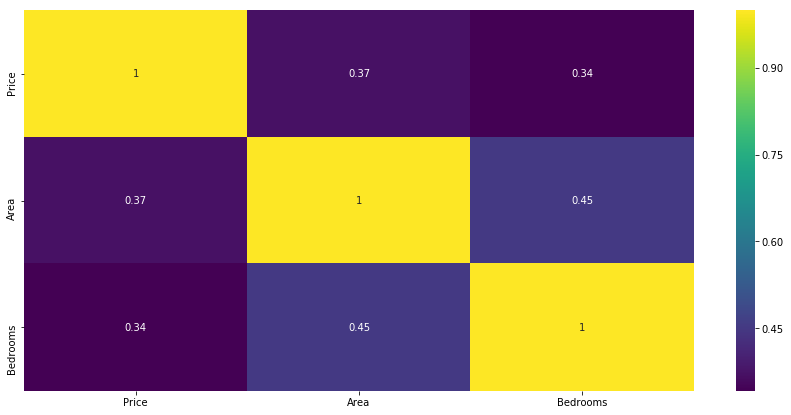

In [19]:
#map correlation
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [0]:
'''From the earlier data.describe() output, 
I observed that the values of 2 variables - price and area - 
are large and will affect the absolute numbers of the regression model. 
To manage this, I will normalise the data using log.'''

df['Price'] = np.log(df['Price'])
df['Area'] = np.log(df['Area'])

In [0]:
X = df.iloc[:,1:4].values
y = df.iloc[:, 0].values

In [0]:
#dummy variable for Location
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

In [0]:
#Spliting ddataset into train and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
#fitting Linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_pred = regressor.predict(X_test)
y_pred

array([18.09133366, 17.2973249 , 15.88983643, ..., 18.25811924,
       16.54419066, 16.77715532])

In [73]:
#Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((4447, 1)).astype(int), values = X, axis= 1)
X_opt = X[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog= y, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.074
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    -101.8
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               1.00
Time:                        09:21:35   Log-Likelihood:                -5767.7
No. Observations:                4447   AIC:                         1.154e+04
Df Residuals:                    4443   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.767e+13   1.48e+12    -18.698      0.000   -3.06e+13   -2.48e+13
x1          9.222e+12   4.93e+11     18.698      0.000    8.26e+12    1.02e+13
x2          9.223e+12   4.93e+11     18.698      0.000    8.26e+12    1.02e+13
x3          9.223e+12   4.93e+11     18.698      0.000    8.26e+12    1.02e+13
x4            -0.3157      0.626     -0.504      0.614      -1.544       0.912
x5            -0.9529      0.886     -1.076      0.282      -2.689       0.784
==============================================================================
Omnibus:                     2440.447   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204099.423
Skew:                          -1.743   Prob(JB):                         0.00
Kurtosis:                      36.005   Cond. No.                     2.14e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.89e-47. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:

X_opt = X[:, [0,1,2,3,5]]
regressor_OLS = sm.OLS(endog= y, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.098
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    -198.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               1.00
Time:                        09:30:33   Log-Likelihood:                -5817.4
No. Observations:                4447   AIC:                         1.164e+04
Df Residuals:                    4444   BIC:                         1.166e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.767e+13    1.5e+12    -18.492      0.000   -3.06e+13   -2.47e+13
x1          9.223e+12   4.99e+11     18.492      0.000    8.24e+12    1.02e+13
x2          9.223e+12   4.99e+11     18.492      0.000    8.24e+12    1.02e+13
x3          9.223e+12   4.99e+11     18.492      0.000    8.24e+12    1.02e+13
x4            -0.9527      0.896     -1.064      0.287      -2.708       0.803
==============================================================================
Omnibus:                     2439.887   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204027.277
Skew:                          -1.743   Prob(JB):                         0.00
Kurtosis:                      36.000   Cond. No.                     2.03e+30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-57. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog= y, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.079
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    -324.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               1.00
Time:                        09:31:21   Log-Likelihood:                -5778.1
No. Observations:                4447   AIC:                         1.156e+04
Df Residuals:                    4445   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.538e+13   8.25e+11    -18.657      0.000    -1.7e+13   -1.38e+13
x1           8.47e+12   4.54e+11     18.657      0.000    7.58e+12    9.36e+12
x2           8.47e+12   4.54e+11     18.657      0.000    7.58e+12    9.36e+12
x3         -1.556e+12   8.34e+10    -18.657      0.000   -1.72e+12   -1.39e+12
==============================================================================
Omnibus:                     2438.699   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203764.503
Skew:                          -1.741   Prob(JB):                         0.00
Kurtosis:                      35.978   Cond. No.                     1.34e+28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-53. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""